## Predicting User Knowledge Levels

DSCI 100 - Project Group 40

Members: Sam Kao, Namya Sharma, Yulu Duan, Jason Zhou

### Introduction

The User Knowledge dataset contains a total of 403 observations and covers a total of six variables, including a single categorical variable and the remaining five variables as numerical doubles. The variables within the dataset are: STG (The degree of study time for goal object materials), SCG (The degree of repetition number of user for goal object materials), STR (The degree of study time of user for related objects with goal object), LPR (The exam performance of user for related objects with goal object), PEG (The exam performance of user for goal objects), and UNS (categorical variable; an individual’s knowledge level). The goal object in this dataset refers to a user’s knowledge on electrical DC machines (Masrofin, 2019). Hence in this case, the exam performance of the goal objects refers to the standardardized test scores that a student receives on an examination based on the topic of electrical machines.

Within this report, we will use the User Knowledge dataset to create a K-nearest neighbours classifier in order to answer our question, as follows: 

**Question:** What will the knowledge level (UNS) of an individual be based on their exam performance of the goal object (PEG)? 

Such a classifier can be the next step in helping recruiters select the best applicants for job positions by helping them categorize candidates’ knowledge levels and thus help sort through numerous applicants efficiently. 

### Methods

To build our model, we will be using the K-nearest neighbours algorithm which operates by computing the Euclidean (straight-line) distance between a new observation and all the other observations in the training dataset and uses the majority label of the “K”-nearest points to the unlabelled observation (Timbers et al., 2021). We begin by distinguishing the training and testing sets within the User Knowledge dataset and ensuring the variables are the correct data types before using solely the training set to tune our model. We created a recipe where we utilized the functions to scale and center the variables and then built a model specification by using the nearest_neighbours function and setting the engine and mode to “kknn” and “classification” respectively. To choose the optimal “K” nearest neighbour value, we conducted cross validation by splitting the training dataset into 5 folds and testing out K values from 1-100. By creating a plot of the K value vs its relative accuracy, we were able to determine that the best K for our model was at K=16 as it provided the highest accuracy value at 84%. We retrained the model using K=16 and fitted the model to the training dataset. We then determined the accuracy of the final product by using the trained model to predict the labels on the testing dataset and obtained an accuracy value of 86%. Our group also wanted to visualize the user knowledge predictions made by our model, hence we created four completely new PEG values unseen by our model and plotted these values as straight horizontal lines on a bar graph with the averages of the different knowledge classes on the x-axis. By observing which knowledge “bar” the observation crossed first, we visualized which knowledge label it would be classified as. 

### Exploratory Data Analysis

In [3]:
# loading the necessary libraries for our analysis
# Setting the seed, so the result should be the same for each run
set.seed(1)
library(tidyverse)
library(tidymodels)
library(readxl)
library(dplyr)
library(gridExtra)
library(magrittr)
library(tibble)
library(yardstick)
options(repr.matrix.max.rows = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

In [4]:
# Reading the data
url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/00257/Data_User_Modeling_Dataset_Hamdi%20Tolga%20KAHRAMAN.xls"
download.file(url, "data.xls")
training_data <- read_excel("data.xls", sheet = 2) # sheet 2 => training data
testing_data <- read_excel("data.xls", sheet = 3) # sheet 3 => testing data


# Select only the columns we need and making our class as a factor
training_data <- training_data %>%
    select(1:6) %>%
    mutate(UNS = as_factor(UNS))

testing_data <- testing_data %>%
    select(1:6) %>%
    mutate(UNS = as_factor(UNS))

# We noticed that the testing data and training data have varying lables. In the testing data
# the label for very low UNS is present as 'Very Low' however this same label is presented as 'very_low'
# in the training data. For this reason, we need to match the labels, otherwise the accuracy can't be predicted.
# We then have to make the column into a fct class again
testing_data <- testing_data %>%
    mutate_at('UNS', str_replace, 'Very Low', 'very_low') %>%
    mutate(UNS = as_factor(UNS))

training_data
testing_data

New names:
* `` -> ...7
* `` -> ...8

New names:
* `` -> ...7
* `` -> ...8



STG,SCG,STR,LPR,PEG,UNS
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0.00,0.00,0.00,0.00,0.00,very_low
0.08,0.08,0.10,0.24,0.90,High
0.06,0.06,0.05,0.25,0.33,Low
⋮,⋮,⋮,⋮,⋮,⋮
0.54,0.82,0.71,0.29,0.77,High
0.50,0.75,0.81,0.61,0.26,Middle
0.66,0.90,0.76,0.87,0.74,High


STG,SCG,STR,LPR,PEG,UNS
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0.00,0.10,0.50,0.26,0.05,very_low
0.05,0.05,0.55,0.60,0.14,Low
0.08,0.18,0.63,0.60,0.85,High
⋮,⋮,⋮,⋮,⋮,⋮
0.56,0.60,0.77,0.13,0.32,Low
0.66,0.68,0.81,0.57,0.57,Middle
0.68,0.64,0.79,0.97,0.24,Middle


In [5]:
# Summarize the training data, counting how many occurences of each class
set.seed(1)
num_of_class <- training_data %>%
    mutate(UNS = factor(UNS, levels = c("High", "Middle", "Low", "very_low"))) %>%
    count(UNS)

num_of_class

UNS,n
<fct>,<int>
High,63
Middle,88
Low,83
very_low,24


In [6]:
# Computing the means of the predictor variables in dataset
set.seed(1)
predictors_mean <- training_data %>%
                  summarize (mean_STG = mean(STG, na.rm = TRUE),
                             mean_SCG = mean(SCG, na.rm = TRUE),
                             mean_STR = mean(STR, na.rm = TRUE),
                             mean_LPR = mean(SCG, na.rm = TRUE),
                             mean_PEG = mean(PEG, na.rm = TRUE))
predictors_mean

mean_STG,mean_SCG,mean_STR,mean_LPR,mean_PEG
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.3711473,0.3556744,0.4680039,0.3556744,0.4585388


In [7]:
# Finding rows of missing data
set.seed(1)
missing_data <- training_data %>% 
        filter(is.na(STG), is.na(PEG), is.na(SCG), is.na(STR), is.na(LPR), is.na(UNS)) %>%
        nrow()
missing_data

[1] 0

In [8]:
# Compare the distributions of each of the predictor variables you plan to use in your analysis
# The distribution of exam performace of goal objects (PEG)
set.seed(1)
options(repr.plot.width = 15, repr.plot.height = 12) 
distr_PEG <- training_data %>%
    mutate(UNS = factor(UNS, levels = c("High", "Middle", "Low", "very_low"))) %>% 
    ggplot(aes(x = PEG, fill = UNS)) +
    geom_histogram(binwidth = .01)+
    labs(x = "Exam performance of goal objects", fill = "The knowledge level of user")+
    ggtitle("PEG vs UNS distribution")+
    theme(text = element_text(size= 18))+
    facet_grid(rows = vars(UNS))

In [9]:
# Compare the distributions of each of the predictor variables you plan to use in your analysis
# The distribution of the degree of study time for goal object materails (STG)
set.seed(1)
options(repr.plot.width = 15, repr.plot.height = 12) 
distr_STG <- training_data %>%
    mutate(UNS = factor(UNS, levels = c("High", "Middle", "Low", "very_low"))) %>%
    ggplot(aes(x = STG, fill = UNS)) +
    geom_histogram(binwidth = .01)+
    labs(x = "Study time for goal object materails", fill = "The knowledge level of user")+
    ggtitle("STG vs UNS distribution")+
    theme(text = element_text(size= 18))+
    facet_grid(rows = vars(UNS))

In [10]:
# Compare the distributions of each of the predictor variables you plan to use in your analysis
# The degree of repetition number of user for goal object materials (SCG)
set.seed(1)
options(repr.plot.width = 15, repr.plot.height = 12) 
distr_SCG <- training_data %>%
    mutate(UNS = factor(UNS, levels = c("High", "Middle", "Low", "very_low"))) %>%
    ggplot(aes(x = SCG, fill = UNS)) +
    geom_histogram(binwidth = .01)+
    labs(x = "Degree of repition for goal object materails", fill = "The knowledge level of user")+
    ggtitle("SCG vs UNS distribution")+
    theme(text = element_text(size= 18))+
    facet_grid(rows = vars(UNS))

In [11]:
# Compare the distributions of each of the predictor variables you plan to use in your analysis
# The degree of study time of user for related objects with goal object (STR)
set.seed(1)
options(repr.plot.width = 10, repr.plot.height = 10) 
distr_STR <- training_data %>%
    mutate(UNS = factor(UNS, levels = c("High", "Middle", "Low", "very_low"))) %>%
    ggplot(aes(x = STR, fill = UNS)) +
    geom_histogram(binwidth = .01)+
    labs(x = "Degree of study time for goal object materails", fill = "The knowledge level of user")+
    ggtitle("STR vs UNS distribution")+
    theme(text = element_text(size= 18))+
    facet_grid(rows = vars(UNS))

In [12]:
# Compare the distributions of each of the predictor variables you plan to use in your analysis
# The exam performance of user for related objects with goal object (LPR)
set.seed(1)
options(repr.plot.width = 15, repr.plot.height = 12) 
distr_LPR <- training_data %>%
    mutate(UNS = factor(UNS, levels = c("High", "Middle", "Low", "very_low"))) %>%
    ggplot(aes(x = LPR, fill = UNS)) +
    geom_histogram(binwidth = .01)+
    labs(x = "Exam performance of related object", fill = "The knowledge level of user")+
    ggtitle("LPR vs UNS distribution")+
    theme(text = element_text(size= 18))+
    facet_grid(rows = vars(UNS))

Warning message:
“package ‘cowplot’ was built under R version 4.0.3”


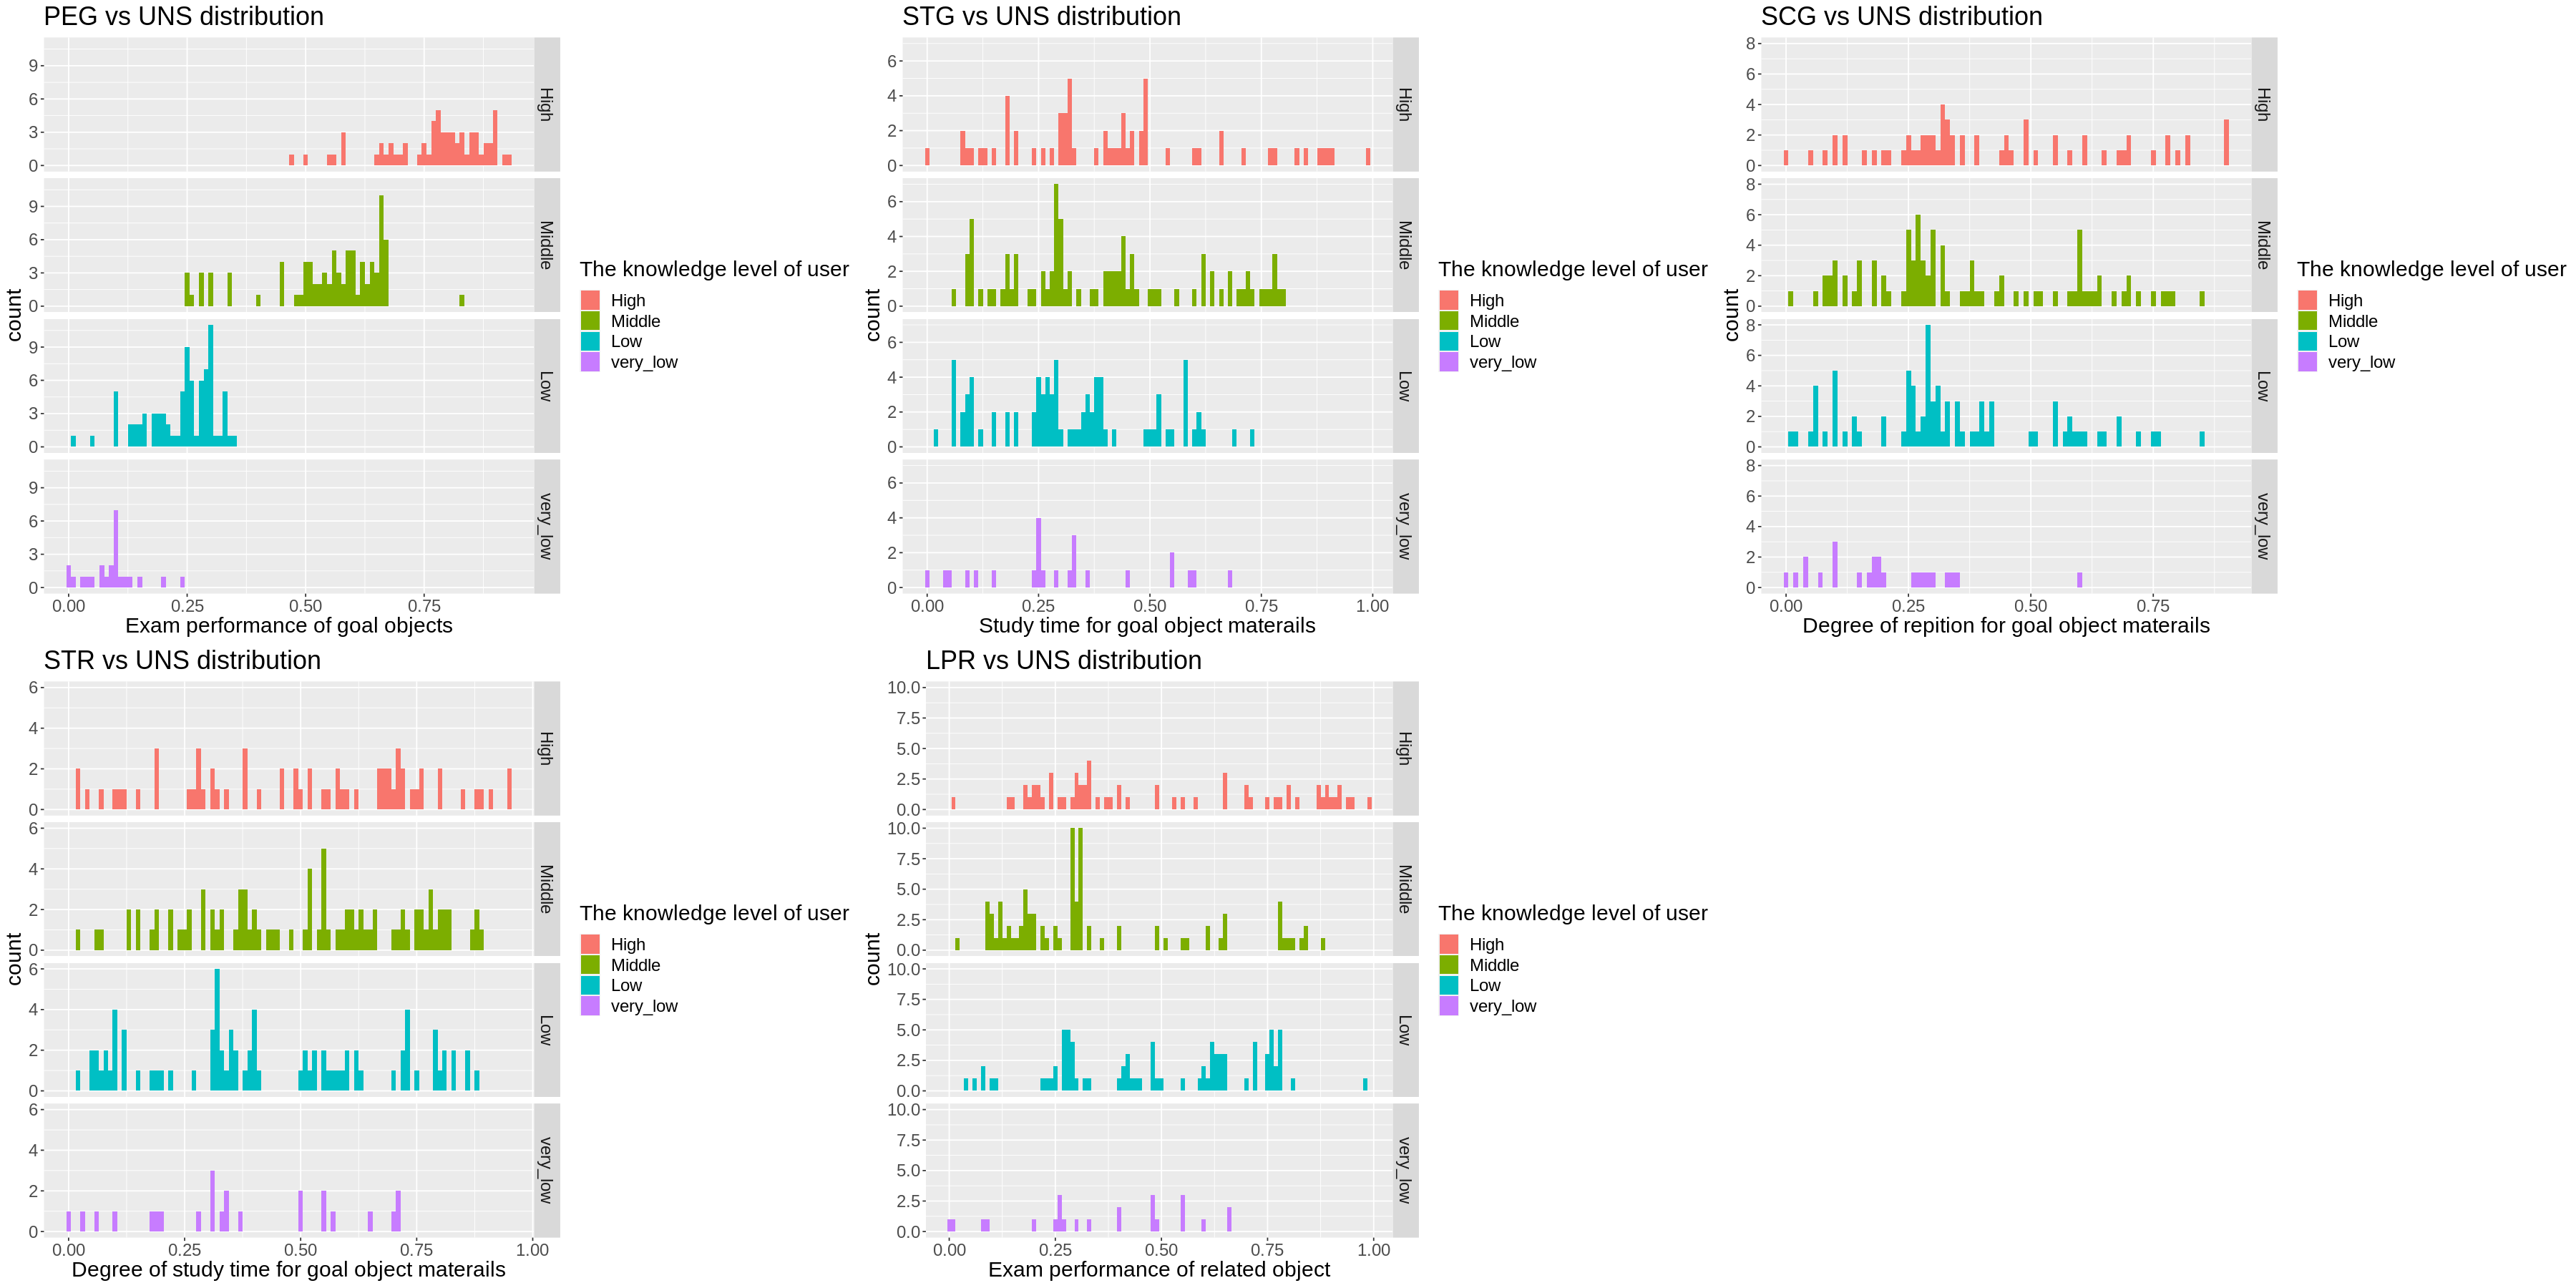

In [13]:
# Side-by side comparison of the distributions of each of the predictor variables in the dataset
set.seed(1)
library(cowplot)
options(repr.plot.width = 30, repr.plot.height = 15)
plot_grid(distr_PEG, distr_STG, distr_SCG, distr_STR, distr_LPR)
options(repr.plot.width = 30, repr.plot.height = 15)

### Building K-NN Model

In [14]:
set.seed(1)
# Scale and center our data
data_recipe <- recipe(UNS ~ PEG, data = training_data) %>%
  step_scale(all_predictors()) %>%
  step_center(all_predictors())

# Create the K-nn model specification
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
  set_engine("kknn") %>%
  set_mode("classification")

knn_spec

# Split the training data into 5 folds
data_vfold <- vfold_cv(training_data, v = 5, strata = UNS)

K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


In [15]:
set.seed(1)
# Set up different K values to test during cross validation
k_vals <- tibble(neighbors = seq(from = 1, to = 100, by = 5))

# Combine in a workflow, collect metrics from cross validation
knn_results <- workflow() %>%
  add_recipe(data_recipe) %>%
  add_model(knn_spec) %>%
  tune_grid(resamples = data_vfold, grid = k_vals) %>%
  collect_metrics()

# Obtain accuracy values for different K values from metrics
accuracies <- knn_results %>%
    filter(.metric == "accuracy")
accuracies

! Fold3: internal: No observations were detected in `truth` for level(s): 'very_l...



neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,multiclass,0.7684157,5,0.02771391,Model01
6,accuracy,multiclass,0.8216669,5,0.01677285,Model02
11,accuracy,multiclass,0.8408975,5,0.01012984,Model03
⋮,⋮,⋮,⋮,⋮,⋮,⋮
86,accuracy,multiclass,0.7823491,5,0.03188190,Model18
91,accuracy,multiclass,0.7823491,5,0.03188190,Model19
96,accuracy,multiclass,0.7323491,5,0.03098063,Model20


mean,neighbors
<dbl>,<dbl>
0.8447436,16


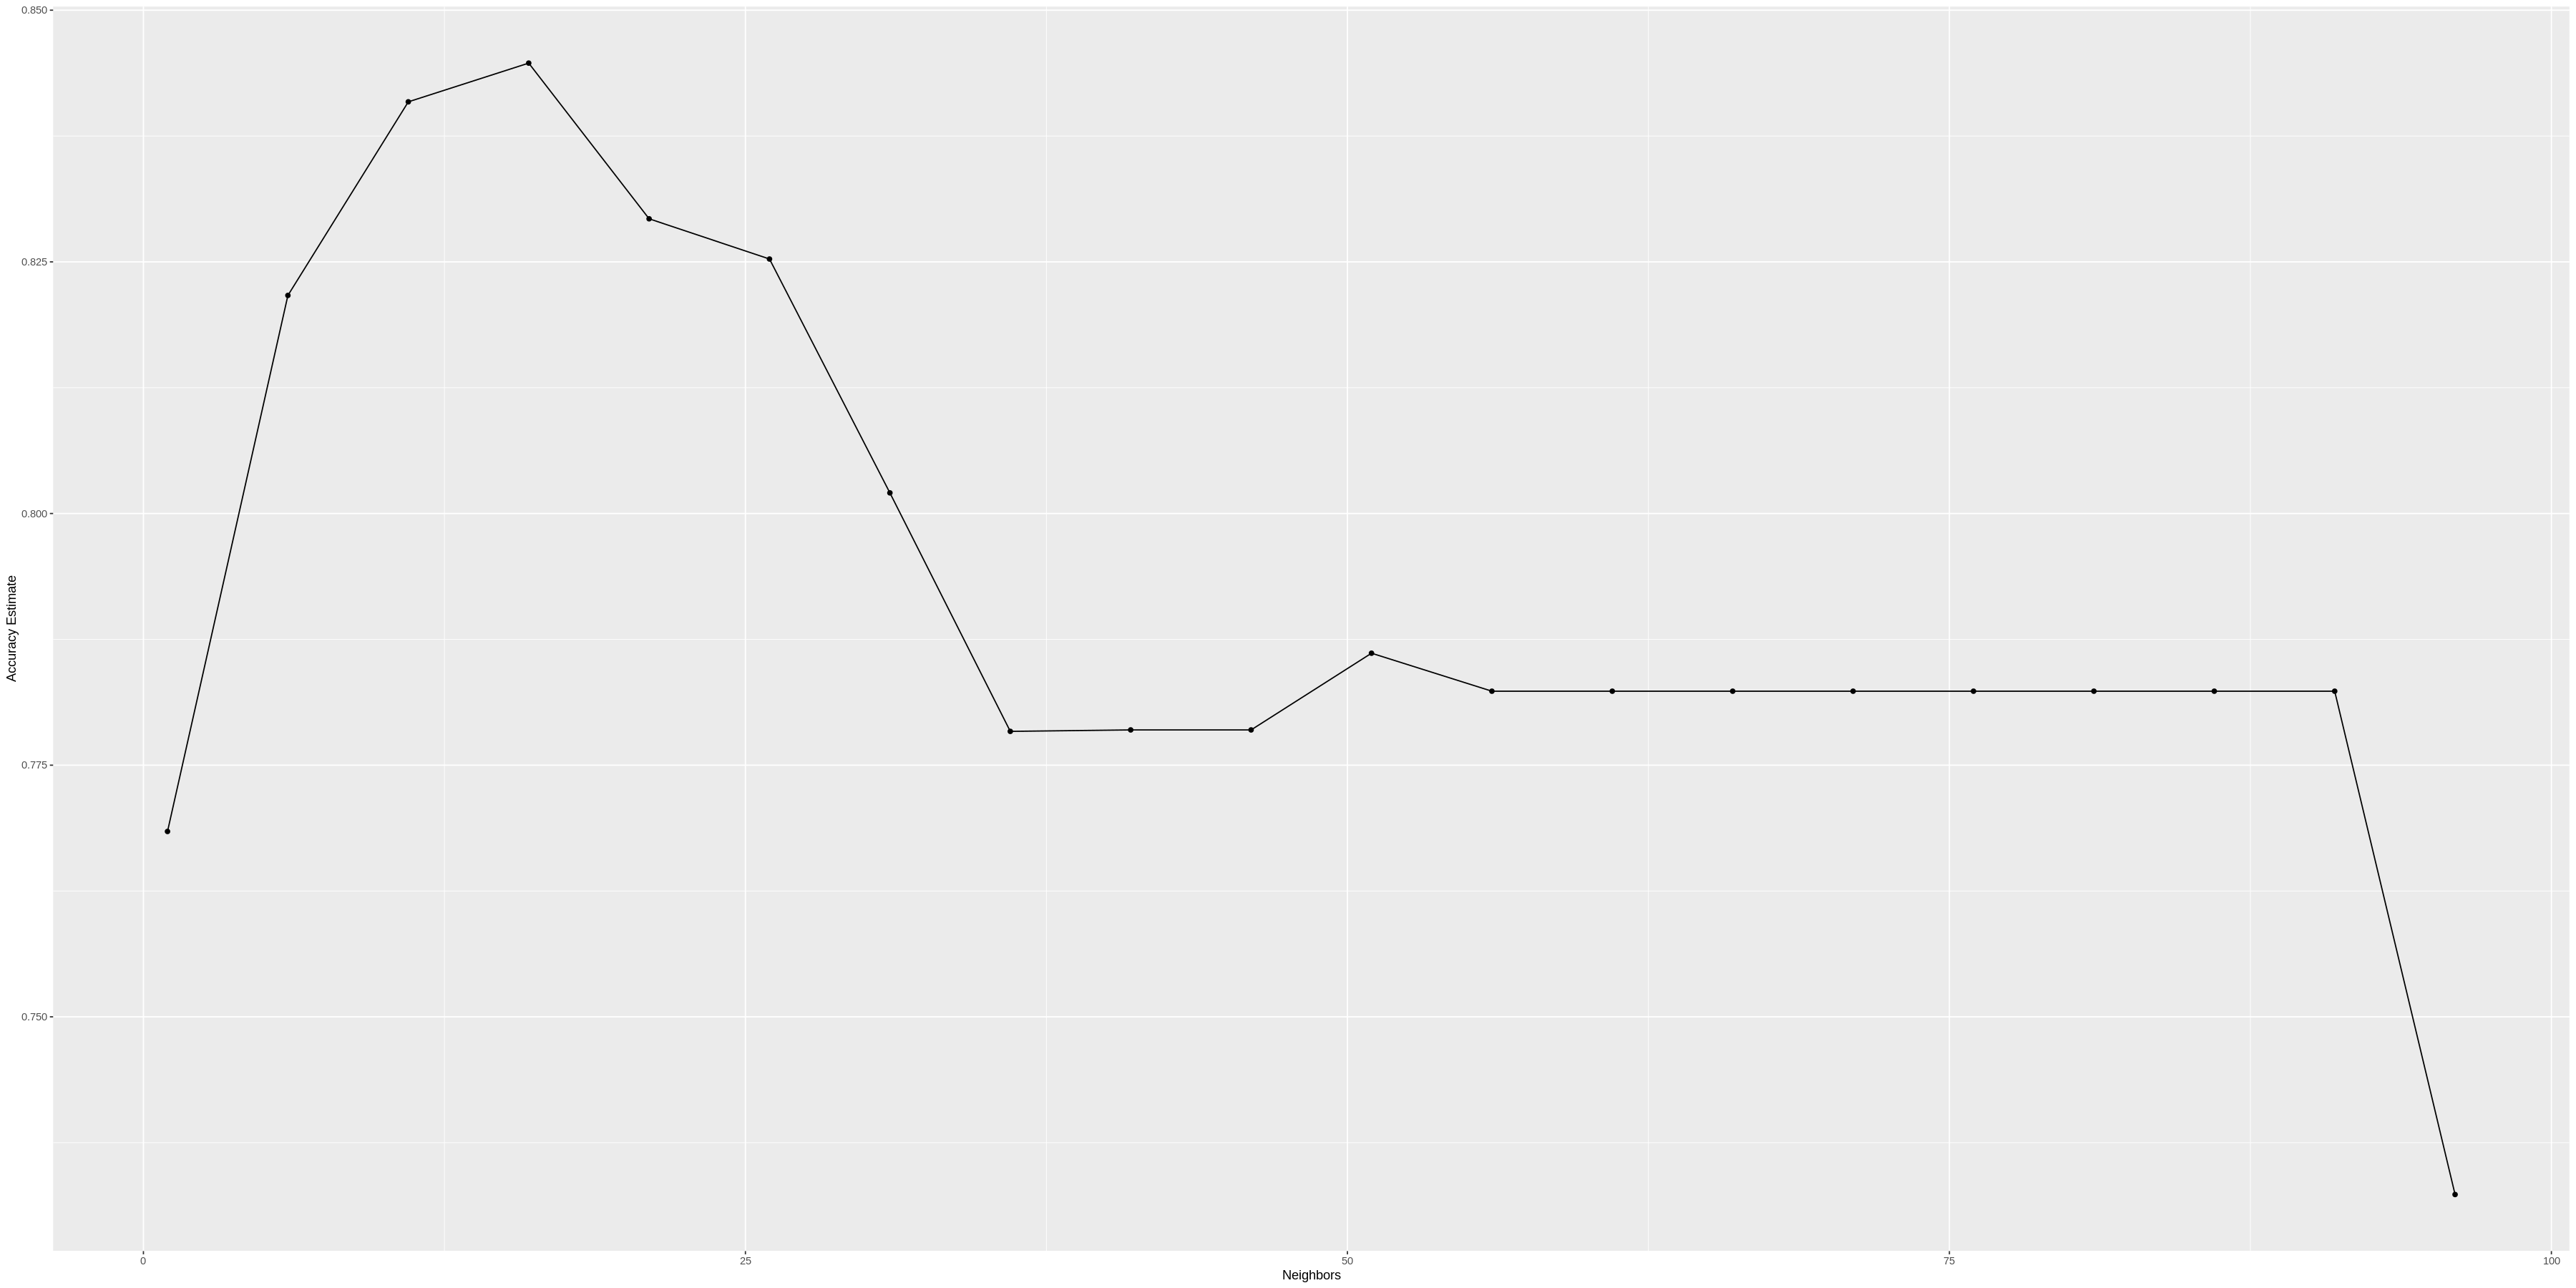

In [16]:
set.seed(1)
# Plot accuracy of each K to decide on best K
accuracy_vs_k <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Neighbors", y = "Accuracy Estimate")

accuracy_vs_k

# Select the best K
best_k <- accuracies %>%
    select(mean, neighbors) %>%
    arrange(desc(mean)) %>%
    slice(1)

best_k
# Best K is 16

In [17]:
set.seed(1)
# Now that we know our K = 16, we train the model again using K = 16

# Make model specification using 16 neighbors
knn_spec <- nearest_neighbor(weight_func = 'rectangular', neighbors = 16) %>%
    set_engine('kknn') %>%
    set_mode('classification')

# Fit model specification to our training data
knn_fit <- knn_spec %>%
    fit(UNS ~ PEG, data = training_data)

### Model Testing We tried using the textbooks method of metrics, but the factor values were different, so we decided to use the manual method instead

In [18]:
# Set the seed
set.seed(1)

# Predict testing_data using knn_fit model
predict_testing <- predict(knn_fit, testing_data)

# Select the UNS column from testing data and bind the columns
# of our predictions to it
comparison <- testing_data %>%
    select(UNS) %>%
    bind_cols(predict_testing)

# Make a new tibble thats just the truth AKA UNS
truth <- comparison %>%
    select(UNS)

# Make a new tibble thats just the prediction AKA .pred_class
pred <- comparison %>%
    select(.pred_class)

# Calculate our models accuracy
sum(pred==truth) / length(pred[[1]])

[1] 0.8689655

In [19]:
set.seed(1)
# Make four new observations of different PEGs (exam scores) that are unseen by the model 
high <- tibble(PEG = 0.7)
mid <- tibble(PEG = 0.4)
low <- tibble(PEG = 0.2)
very_low <- tibble(PEG = 0.0)

# Make predictions
predict(knn_fit, high)
predict(knn_fit, mid)
predict(knn_fit, low)
predict(knn_fit, very_low)

.pred_class
<fct>
High


.pred_class
<fct>
Middle


.pred_class
<fct>
Low


.pred_class
<fct>
very_low


### Visualization

`summarise()` ungrouping output (override with `.groups` argument)



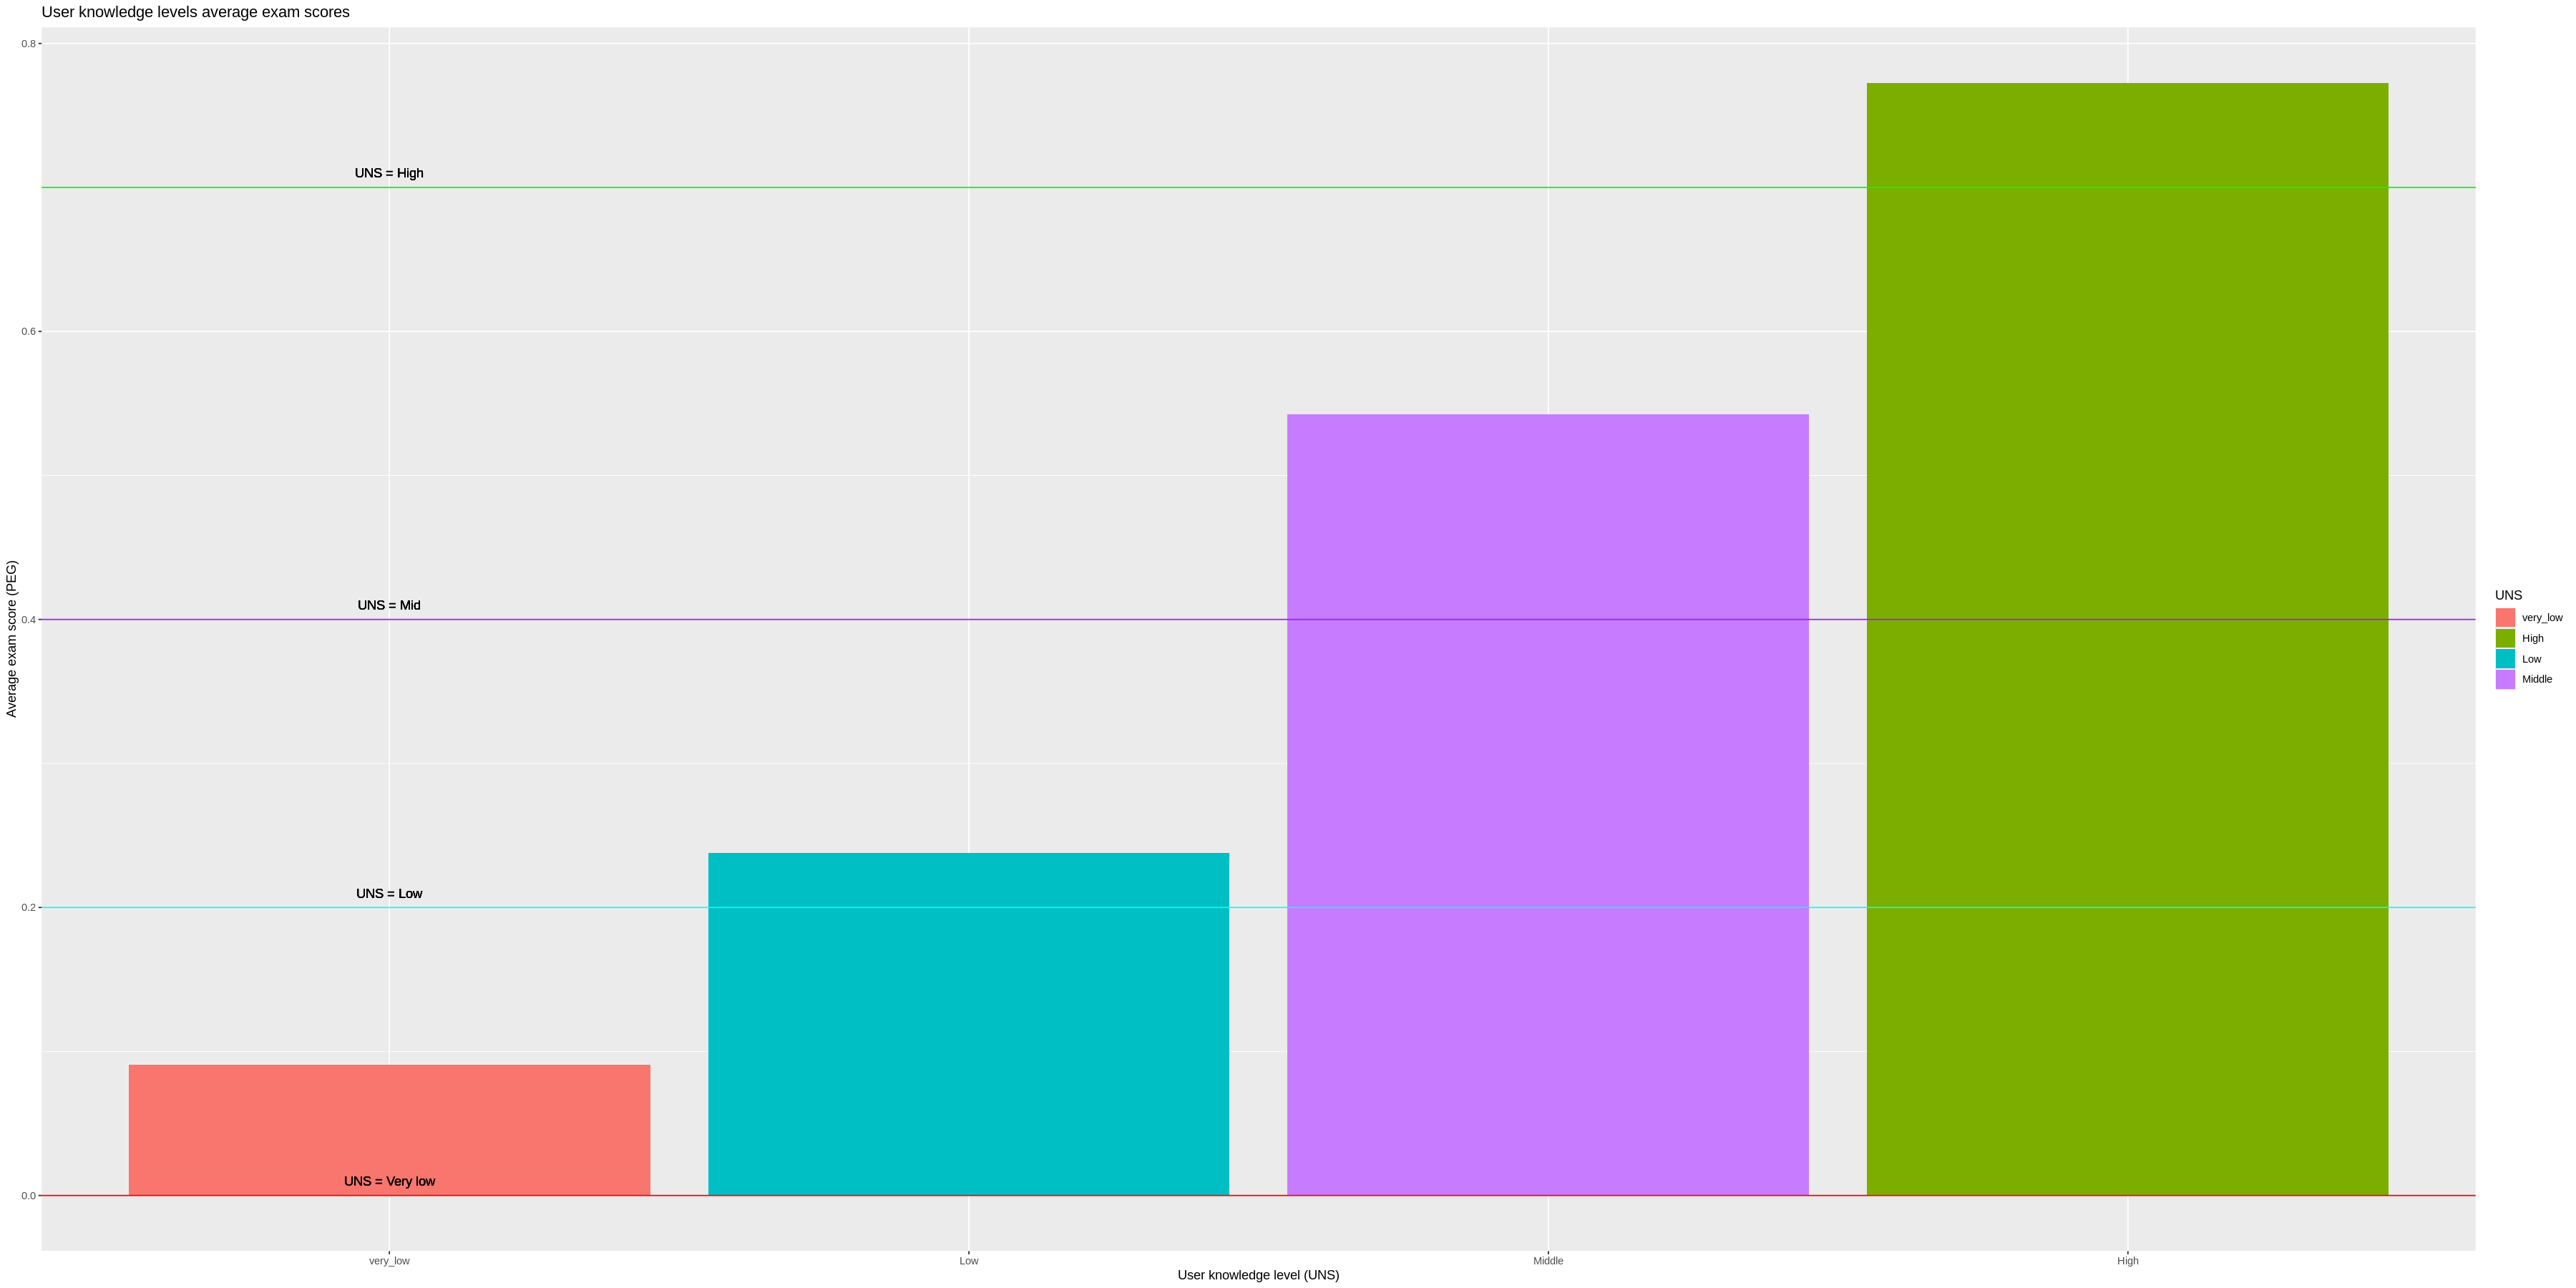

In [20]:
set.seed(1)
# To create a model visualization, display each UNS as a bar on x- axis 
# And average PEG on the y-axis
average_UNS <- training_data %>%
    select('UNS', 'PEG') %>% # select the columns we need
    group_by(UNS) %>% # group_by each UNS class
    summarize(average_PEG = mean(PEG)) %>% # find the average PEG
    arrange(desc(average_PEG))

# Plot the bars, re-ordering the bars in increasing order
# Plot horizontal lines of the exam scores, the bar it strikes first will be the users' knowledge level

model_visualization <- average_UNS %>%
    ggplot(aes(fct_reorder(UNS, average_PEG), average_PEG, fill = UNS)) +
    geom_bar(position = 'stack', stat = 'identity') + 
    geom_hline(yintercept = high[[1]], col = 'Green') +
    geom_hline(yintercept = mid[[1]], col = 'Purple') +
    geom_hline(yintercept = low[[1]], col = 'Cyan') +
    geom_hline(yintercept = very_low[[1]], col = 'Red') +
    geom_text(aes(1, high[[1]] + 0.01, label = 'UNS = High')) +
    geom_text(aes(1, mid[[1]] + 0.01, label = 'UNS = Mid')) +
    geom_text(aes(1, low[[1]] + 0.01, label = 'UNS = Low')) +
    geom_text(aes(1, very_low[[1]] + 0.01, label = 'UNS = Very low')) +
    xlab('User knowledge level (UNS)') +
    ylab('Average exam score (PEG)') +
    ggtitle('User knowledge levels average exam scores')
    
# Average_UNS
model_visualization

### Results and Discussion

### References
1. Masrofin, F. (2019, October 28). KMeans clustering for user knowledge data. Kaggle. Retrieved December 5, 2021, from https://www.kaggle.com/fafiliam/kmeans-clustering-for-user-knowledge-data. 
2. Timbers, T.-A., Campbell, T., & Lee, M. (2021, November 18). Data science: A first introduction. Retrieved December 5, 2021, from https://ubc-dsci.github.io/introduction-to-datascience/. 
3. Kahraman, H. T., Sagiroglu, S., & Colak, I. (2013). The development of intuitive knowledge classifier and the modeling of domain dependent data. Knowledge-Based Systems, 37, 283–295. Retrieved December 5, 2021, from https://doi.org/10.1016/J.KNOSYS.2012.08.009 